<a href="https://colab.research.google.com/github/aayushijain28/lab_programs/blob/main/Sentiment_Analysis_of_Amazon_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Data Collection

In [10]:
column_names = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'review_body']
data = pd.read_csv('/content/Reviews.csv', engine='python', names=column_names, header=0)
print(data.head(3))

       Id   ProductId          UserId             ProfileName  \
0  366265  B001D9JC0G  A2X50XV8GRZ4HG                    John   
1  366266  B001D9JC0G   ATGHBGFCEO78W            Herding Cats   
2  366267  B001D9JC0G  A2P4PTUNWQUM6H  J. Dorr "Mickey's Mom"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1241049600   
1                     1                       1      5  1224547200   
2                     1                       1      1  1221436800   

                                Summary  \
0                Good food for our dogs   
1                still a wonderful food   
2  Canidae Lost Another Loyal Customer!   

                                         review_body  
0  I see a lot of negative comments from other re...  
1  My dogs started on Canidae 3 years ago. All of...  
2  Canidae was the best food for my lab for the l...  


Data Processing

In [12]:
import re
def clean_text(text):
  text=text.lower()
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  text = re.sub(r'\d+', '', text)  # Remove numbers
  return text
data['cleaned_review'] = data['review_body'].apply(clean_text)
print(data['cleaned_review'].head())

0    i see a lot of negative comments from other re...
1    my dogs started on canidae  years ago all of t...
2    canidae was the best food for my lab for the l...
3    this was a fine food until some time in early ...
4    ive tried different foods with my puppies this...
Name: cleaned_review, dtype: object


Sentiment Labelling:-
we need to label each review based on its star rating. We will treat 1–2 stars as negative, 3 stars as neutral and 4–5 stars as positive.

In [15]:
# Label sentiment based on star rating
def label_sentiment(Score):
    if Score in [1, 2]:
        return 'negative'
    elif Score == 3:
        return 'neutral'
    else:
        return 'positive'

data['sentiment'] = data['Score'].apply(label_sentiment)
print(data[['Score', 'sentiment']].head())

   Score sentiment
0      5  positive
1      5  positive
2      1  negative
3      1  negative
4      5  positive


Exploratory Data Analysis

/tmp/ipython-input-3717667714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


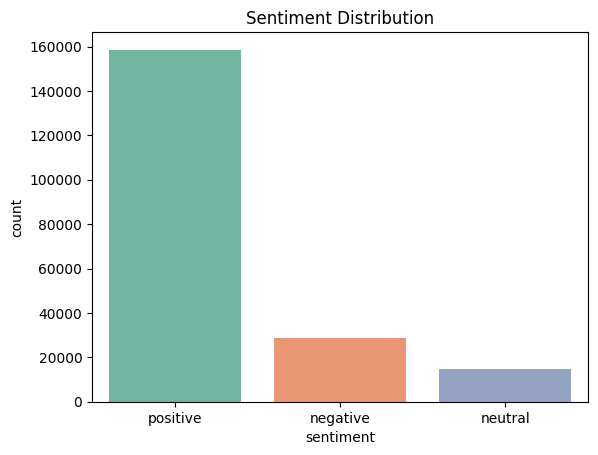

In [22]:
# Visualise the sentiment distribution
sns.countplot(x='sentiment', data=data, palette='Set2', hue='sentiment', legend=False)
plt.title('Sentiment Distribution')
plt.show()

Feature extraction and Text processing

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialise the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the cleaned review text
X = tfidf_vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment']

Model Selection and Training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [27]:
#split the data into testing and training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
#train a logistic regression model
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


Model Evaluation:
We will use accuracy, precision, recall and F1-score to measure its effectiveness.

In [30]:
from sklearn.metrics import accuracy_score, classification_report
#evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
#display the classification score
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

    negative       0.68      0.56      0.62      5755
     neutral       0.49      0.11      0.18      3028
    positive       0.87      0.97      0.92     31655

    accuracy                           0.84     40438
   macro avg       0.68      0.55      0.57     40438
weighted avg       0.82      0.84      0.82     40438



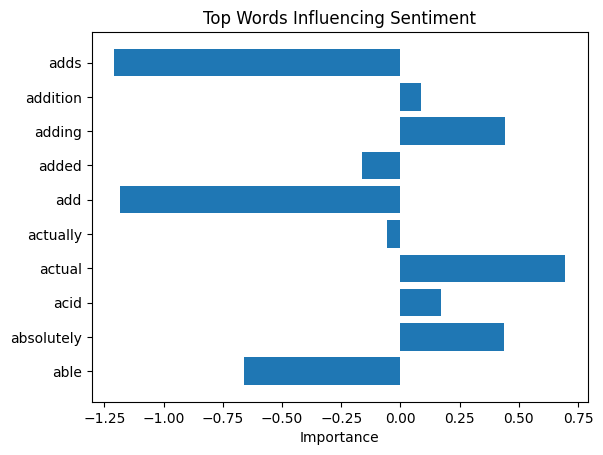

In [31]:
# Visualise important words using a bar chart
important_words = tfidf_vectorizer.get_feature_names_out()[:10]

plt.barh(important_words, model.coef_[0][:10])
plt.xlabel('Importance')
plt.title('Top Words Influencing Sentiment')
plt.show()